# UFRJ / COPPE / PEE
# Otimização Natural - Lista de Exercícios #2

Bettina D'Avila Barros

In [1]:
import random
import math
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Questão 1

Considere um processo de Markov $X(t)$ que tem três estados possíveis: 0, 1, e 2. A evolução temporal deste
processo é dada pela matriz de transição a seguir:


\begin{equation*}
M =  \begin{bmatrix}
0.50 & 0.25 & 0.25 \\
0.25 & 0.50 & 0.25 \\
0.25 & 0.25 & 0.50
\end{bmatrix}
\end{equation*}


a) Considerando que a distribuição de probabilidade de $X(0)$ é dada pelo vetor $p_0 = [0.3$ $0.4$ $0.3]^T$, calcule
a distribuição de probabilidade de $X(3)$ (ou seja, do processo de Markov no instante $t = 3$).

\begin{equation*}
p_3 = M p_2 = M (M p_1) = M^2 (M p_0) = M^3 p_0
= \begin{bmatrix}
0.50 & 0.25 & 0.25 \\
0.25 & 0.50 & 0.25 \\
0.25 & 0.25 & 0.50
\end{bmatrix} ^3
\begin{bmatrix}
0.3 \\
0.4 \\
0.3
\end{bmatrix}
= \begin{bmatrix}
0.3328125 \\
0.334375 \\
0.3328125
\end{bmatrix}
\end{equation*}

In [3]:
M = np.matrix([[0.50, 0.25, 0.25], [0.25, 0.50, 0.25], [0.25, 0.25, 0.50]])
p_0 = np.matrix([[0.3], [0.4], [0.3]])
p_3 = M*M*M*p_0

print p_3

[[ 0.3328125]
 [ 0.334375 ]
 [ 0.3328125]]


b) Iniciando em $X(0) = 1$, e usando um gerador de números aleatórios (são necessários apenas três números aleatórios equiprováveis), calcule manualmente uma amostra do processo $X(t)$ até $t = 3$.

#### Passos para calcular manualmente:
   
   0. Seja $X(t) = x \in \{ 0,1,2 \}$
   1. Sortear um número aleatório uniforme $u$ entre 0 e 1
   2. Se $u \leq M(x,0)$ então $X(t+1) = 0$
   3. Se $0 < u - M(x,0) \leq M(x,1)$ então $X(t+1) = 1$
   4. Se $u > M(x,0) + M(x,1)$ então $X(t+1) = 2$

#### Cálculo manual:

$t = 0$: $X(0) = 1$

$t = 1$: $u = 0.7062 \rightarrow X(1) = 1$

$t = 2$: $u = 0.2475 \rightarrow X(2) = 0$

$t = 3$: $u = 0.1580 \rightarrow X(3) = 0$

#### Cálculo via computador:

In [4]:
x_0 = 1

x_1 = np.random.choice([0, 1, 2], p = M[x_0].tolist()[0])
x_2 = np.random.choice([0, 1, 2], p = M[x_1].tolist()[0])
x_3 = np.random.choice([0, 1, 2], p = M[x_2].tolist()[0])

print x_0, x_1, x_2, x_3

1 1 1 1


c) Usando um computador, execute 100 repetições do item (b). Em cada uma das 100 repetições, comece a simulação com um valor diferente de $X(0)$, assumindo que os eventos $X(0) = 0$, $X(0) = 1$, e $X(0) = 2$ são equiprováveis. Armazene as 100 cadeias obtidas em uma matriz $X$, com 4 colunas ($t = 0$ até $t = 3$) e 100 linhas.

In [5]:
def cadeia(n,t):
    X = np.empty(shape=(n,t+1))
    for i in range(n):
        x_0 = np.random.choice([0, 1, 2])
        
        Xi = [x_0]
        x = x_0
        for j in range(t):
            x = np.random.choice([0, 1, 2], p = M[x].tolist()[0])
            Xi.append(x)
        
        X[i] = Xi
    
    f, axs = plt.subplots(1, t+1, sharey=True, figsize=(20,5))
    axs = axs.ravel()
    
    for j in range(t+1):
        axs[j].hist(X[:,j], bins = t)
        axs[j].set_title('t = '+str(j), fontsize=18)
    
    axs[0].set_ylabel('n = '+str(n), fontsize=18)

    plt.show()

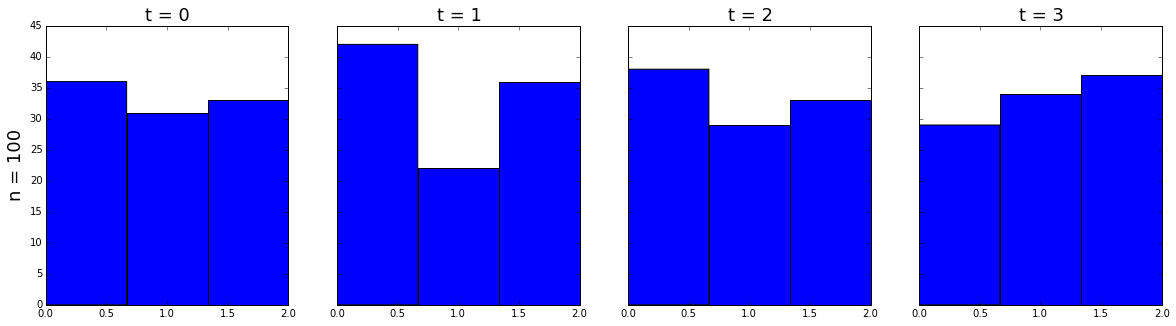

In [6]:
cadeia(n=100,t=3)

d) Fazendo histogramas de cada uma das 4 colunas, calcule as distribuições de probabilidade do processo $X(t)$ em cada um dos 4 instantes: $t = 0, 1, 2, 3$. Comente os resultados obtidos.

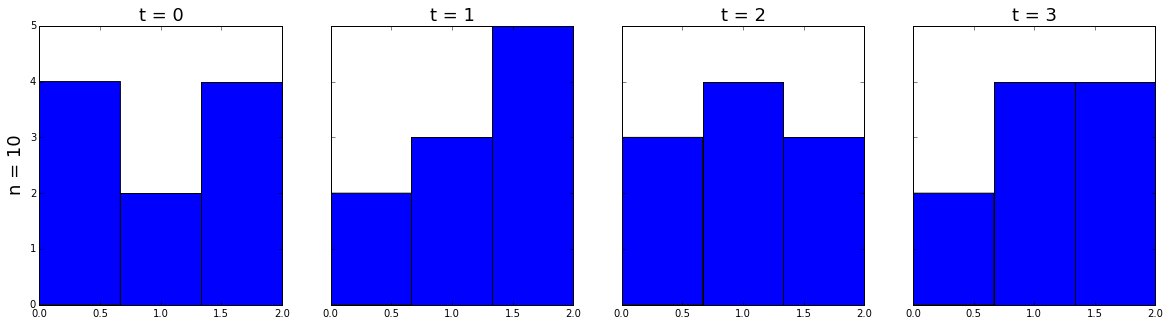

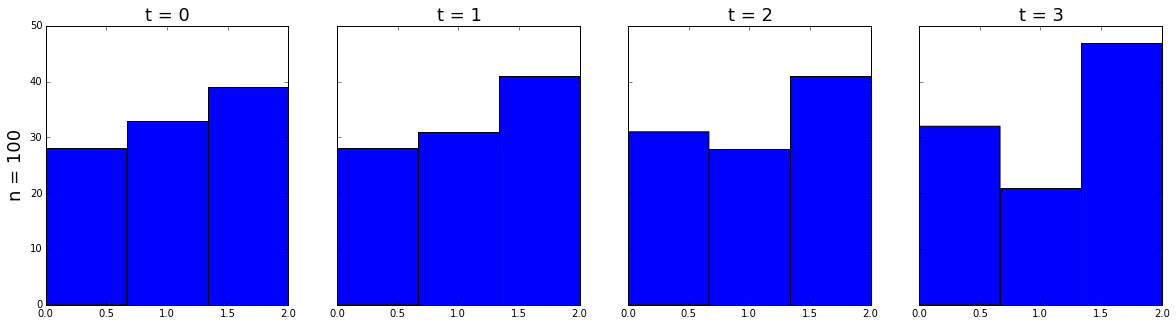

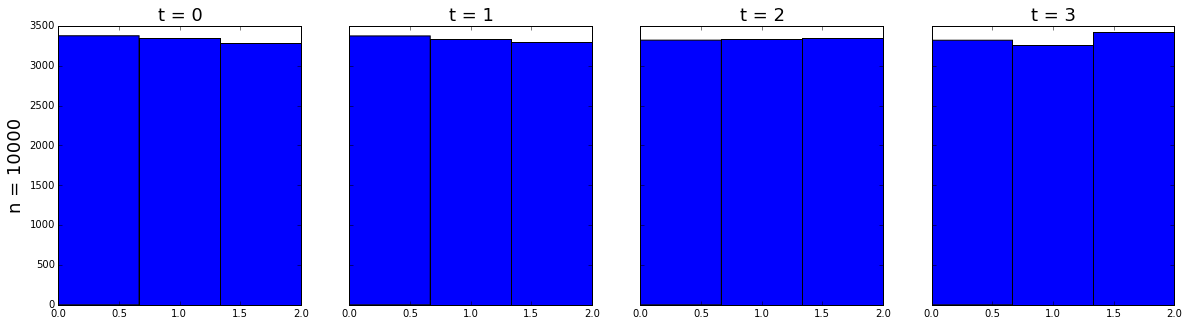

In [7]:
cadeia(n=10,t=3)
cadeia(n=100,t=3)
cadeia(n=10000,t=3)

Perceba que com um número maior de repetições o vetor de probabilidades tende a ficar mais estável.

## Questão 2

Considere um sistema em que só há 5 estados possíveis: $x = 1$, $x = 2$, $x = 3$, $x = 4$, $x = 5$. Os custos $J(x)$ de cada um dos estados são indicados na tabela abaixo:

\begin{array}{r|r}
x & J(x) \\ \hline
1 & 0.5 \\
2 & 0.2 \\
3 & 0.3 \\
4 & 0.1 \\
5 & 0.4
\end{array}

a) Considere um processo de Markov gerado pela aplicação do algoritmo de Metropolis aos dados da tabela
acima, com temperatura fixa $T = 0.1$. Calcule a matriz de transição $M$ que define o processo $X(t)$.
Obs.: note que o estado $X(t)$ é unidimensional, e portanto a matriz $M$ é $5 \times 5$.

$P_{ij} = \frac{1}{1+ e^{\frac{(J(j)-J(i))}{T}}}$

$M_{ij} = \frac{P_{ij}}{Z_i}$, onde $Z_i = \sum_j P_{ij}$

In [8]:
J = [0.5, 0.2, 0.3, 0.1, 0.4]
T = 0.1

n = len(J)
M = np.empty(shape=(n,n))

for i in range(n):
    for j in range(n):
        #M[i,j] = min(1,math.exp((J[i]-J[j])/T))
        M[i,j] = 1/(1+math.exp((J[j]-J[i])/T))

norm = np.linalg.norm(M, ord=1, axis=1)
M = M/norm[:,None]

In [9]:
print M

[[ 0.1235653   0.23541021  0.2176719   0.24268565  0.18066694]
 [ 0.02845617  0.30000682  0.16136852  0.43864511  0.07152338]
 [ 0.04768117  0.29242343  0.2         0.35231883  0.10757657]
 [ 0.01886224  0.28204038  0.12500878  0.52435282  0.04973578]
 [ 0.08068151  0.26423612  0.21931508  0.28576899  0.1499983 ]]


b) Iniciando em $X(0) = 1$, calcule manualmente 4 amostras do processo $X(t)$.

In [10]:
random.random()

0.6445783678407728

#### Passos para calcular manualmente:
   
   1. Sortear um número aleatório uniforme $u$ entre 0 e 1
   2. Se $u \leq M(0,0)$ então $X(1) = 1$
   3. Se $0 < u - M(0,0) \leq M(0,1)$ então $X(1) = 2$
   4. Se $0 < u - M(0,0) - M(0,1) \leq M(0,2)$ então $X(1) = 3$
   5. Se $0 < u - M(0,0) - M(0,1) - M(0,2) \leq M(0,3)$ então $X(1) = 4$
   6. Se $u > M(0,0) + M(0,1) + M(0,2) + M(0,3)$ então $X(1) = 5$

#### Cálculo manual:

Amostra 1: $u = 0.9194 \rightarrow X(1) = 5$

Amostra 2: $u = 0.5491 \rightarrow X(1) = 3$

Amostra 3: $u = 0.4025 \rightarrow X(1) = 3$

Amostra 4: $u = 0.1627 \rightarrow X(1) = 2$

#### Cálculo via computador:

In [11]:
x_0 = 1

x_11 = np.random.choice([1, 2, 3, 4, 5], p = M[x_0-1].tolist())
x_12 = np.random.choice([1, 2, 3, 4, 5], p = M[x_0-1].tolist())
x_13 = np.random.choice([1, 2, 3, 4, 5], p = M[x_0-1].tolist())
x_14 = np.random.choice([1, 2, 3, 4, 5], p = M[x_0-1].tolist())

print x_0, x_11
print x_0, x_12
print x_0, x_13
print x_0, x_14

1 4
1 4
1 2
1 2


c) Qual é o vetor invariante da matriz $M$ do item (a)?

Obs.: para facilitar os cálculos, pode-se usar o computador neste item.

In [12]:
w, v = np.linalg.eig(M)

Autovalores de M:

In [13]:
print w

[ 1.          0.23618535  0.05111701  0.00930699  0.00131388]


Autovetor correspondente ao autovalor 1:

In [14]:
invariant_vector = v[0]
print invariant_vector

[-0.4472136  -0.78234797  0.89459529 -0.75361934 -0.44781202]


d) Calcule os fatores de Boltzmann (ou seja, $e^{−(J(x))/T}$) associados aos dados da tabela acima, e compare-os
com o resultado do item (c). Use $T = 0.1$.

In [15]:
boltzmann = np.array([math.exp(-J[i]/T) for i in range(n)])
print boltzmann

[ 0.00673795  0.13533528  0.04978707  0.36787944  0.01831564]


e) Simulated Annealing: Usando um computador, execute 1000 iterações do algoritmo de Metropolis em cada uma das 10 temperaturas a seguir. Na passagem de uma temperatura para a outra, use o estado atual. Comente as distribuições de probabilidade obtidas no final de cada temperatura.

\begin{array}{r|r|r|r|r|r|r|r|r}
T_0 & T_1 & T_2 & T_3 & T_4 & T_5 & T_6 & T_7 & T_8 & T_9 \\ \hline
0.1000 & 0.0631 & 0.0500 & 0.0431 & 0.0387 & 0.0356 & 0.0333 & 0.0315 & 0.0301 & 0.0289
\end{array}

In [16]:
N = 1000
T = [0.1000, 0.0631, 0.0500, 0.0431, 0.0387, 0.0356, 0.0333, 0.0315, 0.0301, 0.0289]
K = len(T)

X_0 = np.random.choice(range(1,6))
J_0 = J[X_0-1]

X_atual = X_0
J_atual = J_0

J_min = J_atual
X_min = X_atual

X = []
Y = []

for k in range(K):
    T_atual = T[k]
    
    for n in range(N):
        
        X_hat = X_atual + np.random.choice([-1,1])
        if X_hat == 0:
            X_hat = 5
        if X_hat == 6:
            X_hat = 1
        
        J_hat = J[X_hat-1]
        if np.random.uniform(0,1) < math.exp((J_atual-J_hat)/T_atual):
            X_atual = X_hat
            J_atual = J_hat
        if J_hat < J_min:
            J_min = J_hat
            X_min = X_hat
        
        X.append(X_atual)
        Y.append(J_atual)

In [17]:
print X_min, J_min

4 0.1


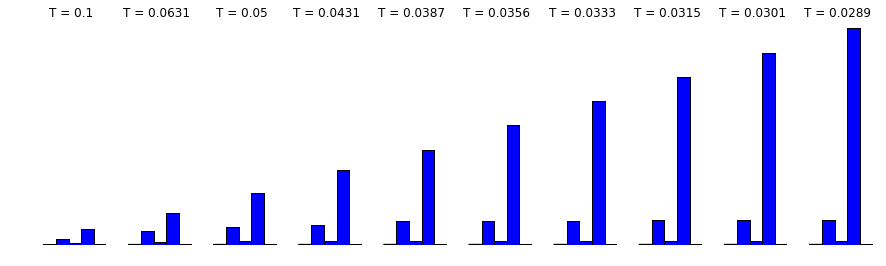

In [18]:
f, axs = plt.subplots(1, 10, sharey=True, figsize=(15,4))
axs = axs.ravel()

for i in range(10):
    axs[i].hist(X[0:(i+1)*1000-1], bins = 5)
    axs[i].set_title("T = " + str(T[i]))
    axs[i].axis('off')

plt.show()

## Questão 3

Proponha uma função $J(x)$, sendo $x$ um vetor com 10 dimensões, cujo ponto mínimo você conheça. Evite propor funções que tenham um só ponto mínimo. Encontre o ponto mínimo global utilizando S.A.

Obs.: neste exercício, entregue o código utilizado e alguns comentários sobre o resultado obtido.

$J(x) = \sum_{k=1}^{d} x_k(x_k-1)(x_k-2)(x_k-4)$, onde $x = [x_1,x_2,...,x_{d}]^T \in  \mathbb{R}^{d}$

In [10]:
def simulated_annealing(N, T_0, epsilon, K, dim):
    
    J = lambda x: sum([x[d]*(x[d]-1)*(x[d]-2)*(x[d]-4) for d in range(dim)])
    
    X_0 = np.random.random(size=dim)
    print(X_0)
    J_0 = J(X_0)
    print(J_0)
    X_atual = X_0
    J_atual = J_0

    J_min = J_atual
    X_min = X_atual
    
    T = T_0

    X = []
    Y = []
    
    for k in range(1,K+1):
        for n in range(N):
            
            X_hat = X_atual + epsilon*np.random.uniform(-1, 1, size=dim)
            J_hat = J(X_hat)
            print
            if np.random.uniform(0,1) < math.exp((J_atual-J_hat)/T):
                X_atual = X_hat
                J_atual = J_hat
            if J_hat < J_min:
                J_min = J_hat
                X_min = X_hat
            
            X.append(X_atual)
            Y.append(J_atual)
        
        T = T/(math.log((1+k),2))

    return X,Y,X_min,J_min

#### Dimensão 1

In [20]:
X,Y,X_min,J_min = simulated_annealing(N = 1, T_0 = 1, epsilon = 0.1, K = 1, dim = 1)

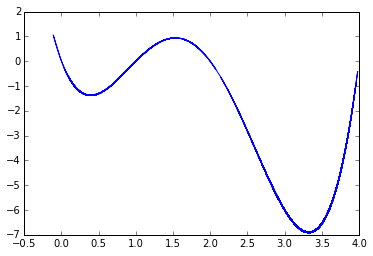

In [21]:
plt.plot(X,Y)
plt.show()

In [22]:
print X_min[0], J_min

3.32634524092 -6.91409678877


#### Dimensão 10

In [11]:
X,Y,X_min,J_min = simulated_annealing(N = 1, T_0 = 1, epsilon = 0.1, K = 1, dim = 10)

[ 0.26759907  0.09290269  0.34030282  0.19148374  0.09446432  0.84016387
  0.35118853  0.84055683  0.40672432  0.05018737]
-9.06424061546



In [24]:
print list(X_min)

[3.3307656923542162, 3.2933424026647686, 3.3238578081812169, 3.3232509419197278, 3.3534608752335986, 3.3288386673398205, 3.3219871422690272, 0.42886385488861944, 3.3196693593964421, 3.3391124112609343]


In [25]:
print J_min

-63.5792090871


Com esses parâmetros o resultado atende às expectativas. Porém, usando um N menor ou uma temperatura menor por exemplo, a solução pode cair em um mínimo local. Veja abaixo:

#### N menor

In [26]:
X,Y,X_min,J_min = simulated_annealing(N = 1000, T_0 = 1, epsilon = 0.1, K = 10, dim = 10)

In [27]:
print list(X_min)

[3.3396933609219355, 0.40893932231264324, 0.37061421933808492, 0.40724381474710508, 0.38811765724911484, 0.40775236003063164, 0.37456064856915816, 0.37652397579189656, 3.3446188018487226, 0.36173722015114707]


In [28]:
print J_min

-24.8660576017


#### T menor

In [29]:
X,Y,X_min,J_min = simulated_annealing(N = 10000, T_0 = 0.1, epsilon = 0.1, K = 10, dim = 10)

In [30]:
print list(X_min)

[0.37476987214273372, 0.39756385927775023, 0.3856566570562639, 0.41332186473118765, 0.39443746691013004, 0.40976844015154285, 0.40929439834504555, 0.39236316437492547, 0.38004531949752346, 0.41244662905072366]


In [31]:
print J_min

-13.8146595965
